In [19]:
%pylab inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy.ma as ma

Populating the interactive namespace from numpy and matplotlib


In [11]:
#Problem 1
class Verse: #Create a class that will perform Freidmann calculations based on input Omega parameters.
    
    def __init__(self,omega_rad,omega_mass,omega_lam):

        self.H0 =  2.2683e-18 #in seconds, already converted since all calculations in this exercise use the same H0 value
        self.omega_rad = omega_rad
        self.omega_mass = omega_mass
        self.omega_lam = omega_lam
        self.omega_0 = (self.omega_rad+self.omega_mass+self.omega_lam)
        pass
    
    def Friedmann_eq(self, x):
        t = np.sqrt(1/(self.H0**2.0*(self.omega_rad*(x**-2.0)+self.omega_mass*(x**-1.0) +
                             self.omega_lam*(x**2.0)+(1.0-self.omega_0+0.j))))
        if imag(t)==0.j:
            return abs(t)
        else:
            pass 

In [25]:
#Input parameters for a Loitering Universe for part a
Loiter = Verse(0.0,0.55,2.055)

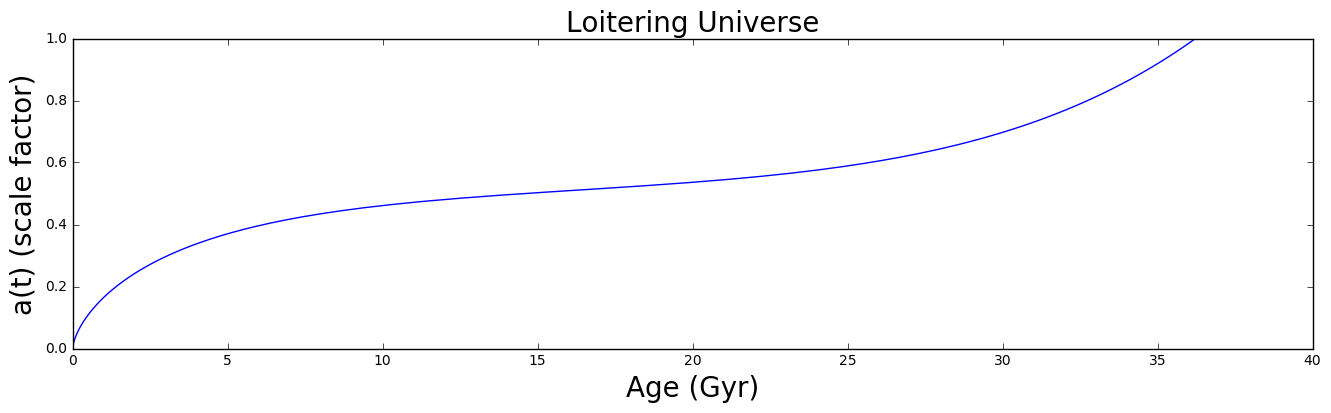

In [28]:
#Integrate and plot results for Loitering Universe
def integrand(x):
        try:
            return quad(Loiter.Friedmann_eq,0.0,x,)
        except:
            return np.nan,np.nan
        
step = 0.01
values_loiter = [] 
a_loiter = np.linspace(0.0,1.0,100)
for i in a_loiter:
    integral0,err = integrand(i)
    values_loiter.append(integral0)
values_loiter = np.asarray(values_loiter)
values_loiter = values_loiter/(1e9*365*24*3600) #convert to Gyr
#print values_loiter

figure(figsize=(16,4))
plt.plot(values_loiter,a_loiter)
xlabel('Age (Gyr)',fontsize = 20)
ylabel('a(t) (scale factor)', fontsize= 20)
title("Loitering Universe", fontsize = 20)

In [33]:
#Input parameters for Big Crunch Universe for part b
BigCrunch = Verse(0.0,6.0,0.0)

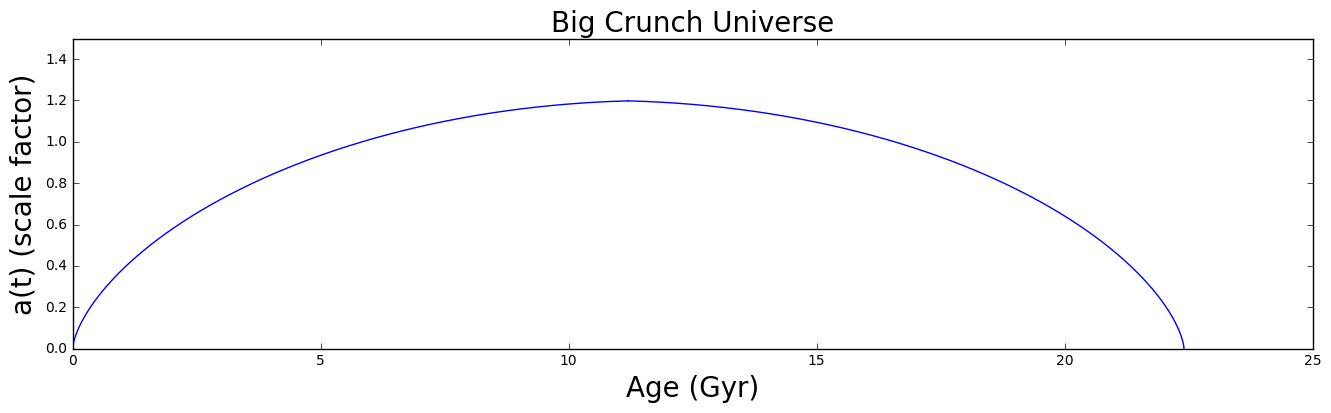

In [39]:
#Integrate and plot Big Crunch
def integrand(x):
        try:
            return quad(BigCrunch.Friedmann_eq,0.0,x,)
        except:
            return np.nan,np.nan
    
step = 0.01
values_crunch = [] 
a_crunch = np.linspace(0.0,3,1000)
for i in a_crunch:
    integral0,err = integrand(i)
    values_crunch.append(integral0)
values_crunch = np.asarray(values_crunch)
values_crunch = values_crunch/(1e9*365*24*3600) # convert to Gyr

values_crunch2 = ma.masked_invalid(values_crunch)
a_crunch2 = ma.masked_array(a_crunch,mask=values_crunch2.mask)

def integrand2(x):
        try:
            return quad(BigCrunch.Friedmann_eq,a_crunch2.max(),x,)
        except:
            return np.nan,np.nan
step = 0.01
values_crunch3 = [] 
a_crunch3 = np.linspace(a_crunch2.max(),0,1000)

for i in a_crunch3:
    integral2,err = integrand2(i)
    values_crunch3.append(integral2)    
values_crunch3 = np.asarray(values_crunch3)
values_crunch3 = values_crunch3/(1e9*365*24*3600) 

    
figure(figsize=(16,4))
plot(values_crunch2,a_crunch2)
plot((values_crunch2.max()-values_crunch3),a_crunch3,c='b')
xlabel('Age (Gyr)',fontsize = 20)
ylabel('a(t) (scale factor)', fontsize= 20)
ylim(0,1.5)
title("Big Crunch Universe", fontsize = 20)

Problem 2

The Einstein Ring equation:

$\theta_{E}^{2} = \frac{4 G M D_{LS}}{c^{2}D_{L}D_{S}}$

Given Isothermal Sphere mass density:

$\rho(r) = \frac{\sigma_{\nu}^{2}}{2 \pi G r^{2}}$

We can thus combine and integrate to find the mass enclosed within a sphere of radius R:

$M(R) = \int^{R} \rho(r) d \vec{ \mathbf{r}} = \int^{R}_{0} \int^{\pi}_{0} \int^{2\pi}_{0}\frac{\sigma_{\nu}^{2}}{2 \pi G r^{2}}r^{2}d\phi d cos\theta dr = \frac{2 \sigma_{\nu}^{2} R}{G}$ 

Rearrange and solve the mass enclosed in the Einstein Ring:

$M = \frac{\theta^{2} c^{2} D_{L} D_{S}}{4 G D_{LS}}$

Which is also equal to the radius dependent Mass found above:

$M = \frac{\theta^{2} c^{2} D_{L} D_{S}}{4 G D_{LS}} \approx \frac{2 \sigma_{\nu}^{2} R}{G}$

Rearrange and solve for the velocity dispersion:

$\sigma_{\nu}^{2} \approx \frac{\theta^{2} c^{2} D_{L} D_{S}}{8 R D_{LS}}$

Apply the small angle approximation with $\theta \approx R/D_{S}$:

$\sigma_{\nu}^{2} \approx \frac{\theta \, c^{2}D_{S}}{8 D_{LS}}$

Simplify using $\theta$ to be in arcseconds instead of radians:

$\sigma_{\nu} \approx 10^{3}km s^{-1} (\frac{\theta \, D_{S}}{22 D_{LS}})^{1/2}$